# adding the libraries and create a cache folder

In [7]:
import fastf1
import os
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

CACHE_DIR = 'cache'
os.makedirs(CACHE_DIR, exist_ok=True)


fastf1.Cache.enable_cache("cache")
plotting.setup_mpl()
print(f"Cache directory ready at: {os.path.abspath(CACHE_DIR)}")

Cache directory ready at: D:\f_1\pythonProject\cache


# Load race data

In [13]:
race = fastf1.get_session(2023, "Monaco", "r")
race.load()
laps = race.laps
laps.head()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:03:27.435000,VER,1,0 days 00:01:24.238000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.420000,...,True,Red Bull Racing,0 days 01:02:02.950000,2023-05-28 13:03:03.927,12,1.0,False,,False,False
1,0 days 01:04:46.802000,VER,1,0 days 00:01:19.367000,2.0,1.0,NaT,NaT,0 days 00:00:20.954000,0 days 00:00:37.366000,...,True,Red Bull Racing,0 days 01:03:27.435000,2023-05-28 13:04:28.412,1,1.0,False,,False,True
2,0 days 01:06:05.876000,VER,1,0 days 00:01:19.074000,3.0,1.0,NaT,NaT,0 days 00:00:20.854000,0 days 00:00:37.288000,...,True,Red Bull Racing,0 days 01:04:46.802000,2023-05-28 13:05:47.779,1,1.0,False,,False,True
3,0 days 01:07:24.005000,VER,1,0 days 00:01:18.129000,4.0,1.0,NaT,NaT,0 days 00:00:20.835000,0 days 00:00:36.637000,...,True,Red Bull Racing,0 days 01:06:05.876000,2023-05-28 13:07:06.853,1,1.0,False,,False,True
4,0 days 01:08:42.024000,VER,1,0 days 00:01:18.019000,5.0,1.0,NaT,NaT,0 days 00:00:20.745000,0 days 00:00:36.734000,...,True,Red Bull Racing,0 days 01:07:24.005000,2023-05-28 13:08:24.982,1,1.0,False,,False,True


# Basic Data Exploration

In [9]:
laps_summary = laps.groupby("Driver")["LapNumber"].max().sort_values(ascending=False)
print(laps_summary)

Driver
ALO    78.0
LEC    78.0
HAM    78.0
GAS    78.0
SAI    78.0
VER    78.0
RUS    78.0
OCO    78.0
DEV    77.0
BOT    77.0
ALB    77.0
NOR    77.0
ZHO    77.0
PIA    77.0
HUL    76.0
PER    76.0
TSU    76.0
SAR    76.0
MAG    71.0
STR    54.0
Name: LapNumber, dtype: float64


# lap time comparission between drivers

In [17]:
laps["LapTimeSeconds"] = laps["LapTime"].dt.total_seconds()
drivers = ["VER", "ALO", "HAM", "OCO", "RUS", "LEC"]
cleaned = laps[laps["Driver"].isin(drivers)]

fig = px.box(
    cleaned,
    x = "Driver",
    y = "LapTimeSeconds",
    points = "all",
    color = "Driver",
    title = "lap time distribution by driver (2023 Monaco GP)",
    labels = {'LapTimeSeconds': 'Lap Time (s)', 'Driver': 'Driver'}
)
fig.show()
os.makedirs("images", exist_ok=True)
fig.write_image(f"images/lap_time_distribution_{race}.png")

# drivers position after each lap

In [18]:
import os
os.makedirs("images", exist_ok=True)
fig_line = px.line(
    laps[laps["Driver"].isin(drivers)],
    x = "LapNumber",
    y = "Position",
    color = "Driver",
    title = "DRIVER POSITION AFTER EACH LAP",
    labels = {'LapNumber': 'Lap Number', 'Position': 'Position'}
)
fig_line.update_yaxes(autorange="reversed")

fig_line.write_image(f"images/session_progression_{race}.png")
fig_line.show()


# TELEMETRY VISUALISATION

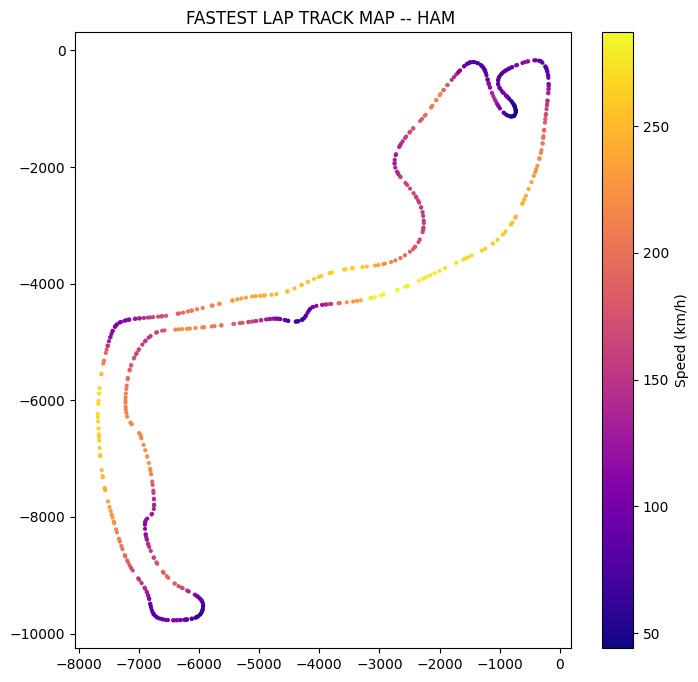

In [84]:
fvt_driver = ("HAM")

fast_lap = laps.pick_drivers(fvt_driver).pick_fastest()
tel = fast_lap.get_telemetry()
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title(f"FASTEST LAP TRACK MAP -- {fast_lap.Driver} ")
sc = ax.scatter(tel["X"], tel["Y"], c = tel["Speed"],   cmap = "plasma", s = 4)
plt.colorbar(sc, label = "Speed (km/h)")
os.makedirs("images", exist_ok=True)
image_path = f"images/{fvt_driver}_fastest_lap_track_map.png"
plt.savefig(image_path, dpi=300, bbox_inches="tight")
plt.show()

# pit stop analysis

In [43]:
pit_counts = laps.groupby('Driver')['PitOutTime'].count().sort_values()
fig = px.bar(
    pit_counts,
    orientation='h',
    title='Number of Pit Stops per Driver',
    labels={'value': 'Pit Stops', 'index': 'Driver'},
)
fig.show()


# Sample UI

In [19]:
%%writefile f1_app.py
import streamlit as st
import fastf1
import os
import pandas as pd
import plotly.express as px
from fastf1 import plotting


CACHE_DIR = 'cache1'
os.makedirs(CACHE_DIR, exist_ok=True)
fastf1.Cache.enable_cache(CACHE_DIR)


plotting.setup_mpl()


st.title("F1 Race Analyzer ")

st.image(r"D:\f_1\pythonProject\images\skysports-f1-leclerc-start_5735012.jpg",
         caption = "dive into F1 DATA ANALYTICS",
         use_container_width= True)


st.sidebar.header("Data Selection")

year = st.sidebar.selectbox("Select Year", [2024, 2023, 2022], index=0)
race = st.sidebar.text_input("Enter Race Name (e.g., Monaco, Bahrain):", "Monaco")
session_type = st.sidebar.selectbox("Session Type", ["R", "Q", "FP1", "S"], index=0)


if 'session' not in st.session_state:
    st.session_state.session = None
if 'laps_session' not in st.session_state:
    st.session_state.laps_session = pd.DataFrame()



if st.sidebar.button("Load F1 Data"):
    with st.spinner(f"Loading data for {race} {year} ({session_type})..."):
        try:

            session = fastf1.get_session(year, race, session_type)
            session.load(
                laps=True,
                telemetry=True,
                weather=True,
                messages=True
            )


            laps_session = session.laps.copy()

            if laps_session.empty:
                st.warning("No lap data found for this session.")
                st.session_state.laps_session = pd.DataFrame()
            else:

                laps_session.loc[:, "LapTimeSeconds"] = laps_session["LapTime"].dt.total_seconds()
                laps_session = laps_session.loc[laps_session['IsAccurate'] == True].reset_index(drop=True)

                st.session_state.session = session
                st.session_state.laps_session = laps_session
                st.success(f"{session.event['EventName']} {year} loaded successfully!")

        except Exception as e:
            st.error(f" Error loading session: {e}")
            st.session_state.session = None
            st.session_state.laps_session = pd.DataFrame()


if not st.session_state.laps_session.empty:
    laps_session = st.session_state.laps_session
    driver_list = sorted(laps_session["Driver"].unique())

    st.header(f"Analysis: {st.session_state.session.event['EventName']} {year} ({session_type})")


    default_drivers = driver_list[:min(len(driver_list), 4)]
    selected_drivers = st.multiselect(
        "Select Drivers for Comparison",
        driver_list,
        default=default_drivers
    )

    filtered_laps = laps_session[laps_session["Driver"].isin(selected_drivers)].copy()

    if not filtered_laps.empty:


        tab1, tab2, tab3 = st.tabs(["Lap Time Distribution (Box Plot)", "Race Progression (Line Plot)", "Telemetry"])

        with tab1:
            st.subheader("Lap Time Consistency and Distribution")

            laps_for_plot = filtered_laps.copy()
            laps_for_plot['LapTimeString'] = laps_for_plot['LapTime'].apply(
                lambda x: f"{int(x.total_seconds() // 60)}:{x.total_seconds() % 60:06.3f}"
            )

            fig_box = px.box(
                laps_for_plot,
                x="Driver",
                y="LapTimeSeconds",
                color="Compound",
                title=f"Lap Time Distribution by Compound – {race} {year}",
                points="all",
                # Use the new string column for the hover tooltip
                hover_data=["LapNumber", "LapTimeString", "Compound"]
            )
            fig_box.update_layout(yaxis_title="Lap Time (Seconds)")
            st.plotly_chart(fig_box, use_container_width=True)
            st.caption(
                "Lower boxes indicate faster and more consistent performance. The color shows which tyre compound was used.")

        with tab2:
            st.subheader("Session Progression (Lap Time over Distance)")

            fig_line = px.line(
                filtered_laps,
                x="LapNumber",
                y="LapTimeSeconds",
                color="Driver",
                line_group="Driver",
                hover_data=["Compound", "TyreLife", "PitOutTime"],
                title=f"Lap Times Over The Session – {race} {year}",
            )


            fig_line.update_traces(mode='lines+markers', marker=dict(size=4))
            fig_line.update_layout(
                xaxis_title="Lap Number",
                yaxis_title="Lap Time (Seconds)",
                hovermode="x unified"
            )
            st.plotly_chart(fig_line, use_container_width=True)
            st.caption("This chart shows how lap times evolve. Jumps often indicate a **pit stop** or **safety car** period. The steep increase in time (degradation) shows tyre wear.")


        with tab3:
            st.subheader("Driver Telemetry Comparison on Fastest Lap")

            col1, col2 = st.columns(2)
            driver_a = col1.selectbox("Driver A", driver_list, index=0)
            driver_b = col2.selectbox("Driver B", driver_list, index=1)


            metric = st.selectbox("Select Telemetry Metric", ['Speed', 'RPM', 'Throttle', 'Brake'], index=0)

            if driver_a and driver_b and driver_a != driver_b:

                with st.spinner(f"Processing fastest lap telemetry for {driver_a} and {driver_b}..."):

                    lap_a = laps_session.pick_driver(driver_a).pick_fastest()
                    lap_b = laps_session.pick_driver(driver_b).pick_fastest()

                    # 2. Check for required data (CarData is essential for speed/throttle/brake)
                    if lap_a is None or lap_b is None:
                        st.warning("One or both selected drivers did not complete an accurate lap.")



                    try:
                        tel_a = lap_a.get_telemetry().add_distance()
                        tel_b = lap_b.get_telemetry().add_distance()
                        tel_merged = tel_a.merge_channels(tel_b)

                        current_session = st.session_state.session
                        color_a = plotting.get_team_color(current_session, lap_a['Team'])
                        color_b = plotting.get_team_color(current_session, lap_b['Team'])

                        fig, ax = plt.subplots(figsize=(10, 6))

                        ax.plot(tel_merged['Distance'], tel_merged[f'{metric}_x'], label=driver_a, color=color_a)
                        ax.plot(tel_merged['Distance'], tel_merged[f'{metric}_y'], label=driver_b, color=color_b)

                        ax.set_xlabel("Distance (m)")
                        ax.set_ylabel(f"{metric}")
                        ax.set_title(f"{metric} Comparison: {driver_a} vs {driver_b}", fontsize=14)
                        ax.legend()
                        ax.grid(True, linestyle='--', alpha=0.6)

                        st.pyplot(fig)
                        st.caption(f"Comparison of {metric} trace on the fastest lap. The X-axis is aligned distance around the track.")

                    except Exception as e:
                        # This catch is now highly specific to telemetry access failure
                        st.warning(f"Could not plot telemetry for these drivers. Data might be missing or corrupted. Error: {e}")
                        st.info("Try selecting a different race/session, or a major team/driver (e.g., VER vs. HAM).")





Overwriting f1_app.py
